In [8]:
%load_ext autoreload
%autoreload 2

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd

In [10]:
df2_ts = pd.read_csv('./csv/gp_ts/gp_ts_2.csv')
df_ts = pd.read_csv('./csv/gp_ts/gp_ts.csv')

df2_ucb = pd.read_csv('./csv/gp_ucb/gp_ucb_2.csv')
df_ucb = pd.read_csv('./csv/gp_ucb/gp_ucb.csv')

In [79]:
def plot_cumulative_reward_comparison(f_max, f_sigma):
    df_subset4 = df2_ts[(df2_ts['f_max'] == f_max) & (df2_ts['f_sigma'] == f_sigma)]
    df_subset4 = df_subset4.groupby(['noise', 'alpha', 'beta']).mean()
    max_reward = df_subset4['total_reward'].max()
    max_reward_records = df_subset4[df_subset4['total_reward'] == max_reward].reset_index()
    
    noise = max_reward_records['noise'].values[0]
    beta = max_reward_records['beta'].values[0]
    alpha = max_reward_records['alpha'].values[0]

    print(f'GP-TS : alpha = {noise} beta = {alpha} sigma = {noise}')
    
    df = df_ts[(df_ts['f_max'] == f_max) & (df_ts['f_sigma'] == f_sigma)]
    df_ts_ = df[(df['noise'] == noise) & (df['beta'] == beta) &  (df['alpha'] == alpha)]
    
    df_subset4 = df2_ucb[(df2_ucb['f_max'] == f_max) & (df2_ucb['f_sigma'] == f_sigma)]
    df_subset4 = df_subset4.groupby(['noise', 'alpha', 'beta']).mean()
    max_reward = df_subset4['total_reward'].max()
    max_reward_records = df_subset4[df_subset4['total_reward'] == max_reward].reset_index()
    
    noise = max_reward_records['noise'].values[0]
    beta = max_reward_records['beta'].values[0]
    alpha = max_reward_records['alpha'].values[0]

    print(f'GP-UCB : alpha = {noise} beta = {alpha} sigma = {noise}')
    
    df = df_ucb[(df_ucb['f_max'] == f_max) & (df_ucb['f_sigma'] == f_sigma)]
    df_ucb_ = df[(df['noise'] == noise) & (df['beta'] == beta) &  (df['alpha'] == alpha)]
    
    df_ucb__ = df_ucb_.groupby('play_time').agg({'reward': ['mean', 'var']})
    df_ucb__['reward', 'mean'] =   f_max - df_ucb__['reward', 'mean']
    
    cumulative_reward_mean_ucb = df_ucb__['reward', 'mean'].rolling(window=100).mean()
    cumulative_reward_std_ucb = np.sqrt(df_ucb__['reward', 'var'].rolling(window=100).var())  
    
    
    df_ts__ = df_ts_.groupby('play_time').agg({'reward': ['mean', 'var']})
    df_ts__['reward', 'mean'] =  f_max - df_ts__['reward', 'mean'] 
    cumulative_reward_mean_ts = df_ts__['reward', 'mean'].rolling(window=100).mean()
    cumulative_reward_std_ts = np.sqrt(df_ts__['reward', 'var'].rolling(window=100).var())
    
    le = [i for i in range(300)]
    
    # 95%信頼区間の計算
    confidence_interval_lower_ucb = cumulative_reward_mean_ucb -  cumulative_reward_std_ucb *2
    confidence_interval_upper_ucb = cumulative_reward_mean_ucb +  cumulative_reward_std_ucb *2
    
    confidence_interval_lower_ts = cumulative_reward_mean_ts -  cumulative_reward_std_ts * 2
    confidence_interval_upper_ts = cumulative_reward_mean_ts +  cumulative_reward_std_ts * 2
    
    # プロットの作成
    plt.plot(le, cumulative_reward_mean_ucb, label='GP-UCB Mean')
    plt.plot(le, cumulative_reward_mean_ts, label='GP-TS Mean')
    plt.axhline(0, color='red', linestyle='dashed', alpha=0.5)
    plt.fill_between(le, confidence_interval_lower_ucb, confidence_interval_upper_ucb, alpha=0.2, label='UCB 95% Confidence Interval')
    plt.fill_between(le, confidence_interval_lower_ts, confidence_interval_upper_ts, alpha=0.2, label='GP-TS 95% Confidence Interval')
    plt.xlabel('Play Time')
    plt.ylabel('Reglet')
    plt.legend()
    plt.grid(True)  
    plt.ylim(-0.15,0.5)
    plt.xlim(100,300)
    plt.show()

GP-TS : alpha = 0.05 beta = 0.25 sigma = 0.05
GP-UCB : alpha = 0.2 beta = 0.3 sigma = 0.2


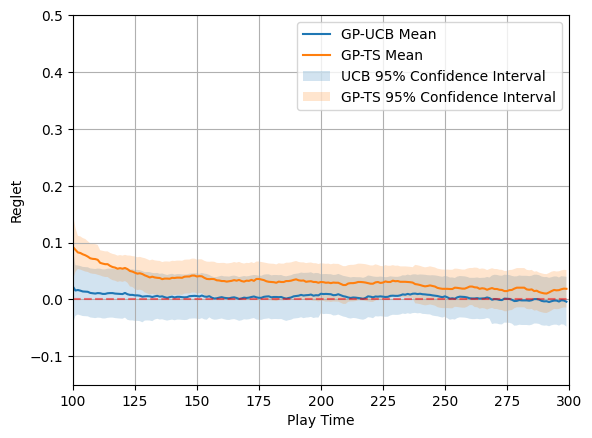

In [80]:
f_max = 0.6
f_sigma = 0.3

plot_cumulative_reward_comparison(f_max, f_sigma)

GP-TS : alpha = 0.05 beta = 0.05 sigma = 0.05
GP-UCB : alpha = 0.3 beta = 0.3 sigma = 0.3


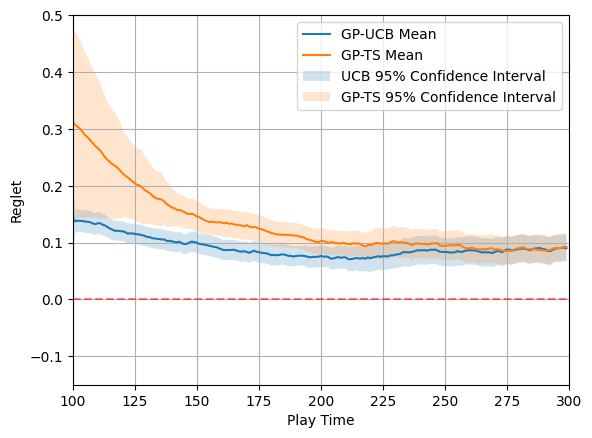

In [81]:
f_max = 0.6
f_sigma = 0.1

plot_cumulative_reward_comparison(f_max, f_sigma)

GP-TS : alpha = 0.05 beta = 0.3 sigma = 0.05
GP-UCB : alpha = 0.15 beta = 0.3 sigma = 0.15


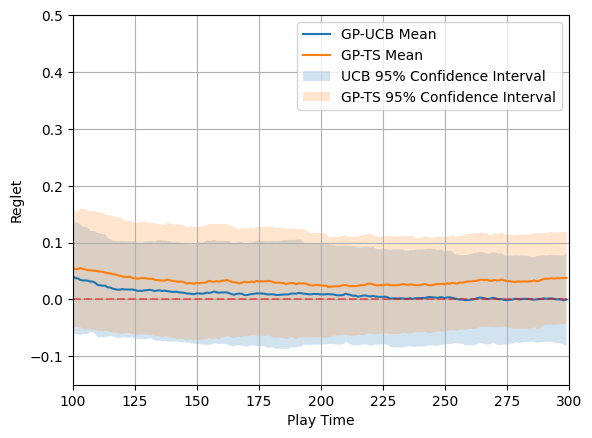

In [82]:
f_max = 0.2
f_sigma = 0.3

plot_cumulative_reward_comparison(f_max, f_sigma)

GP-TS : alpha = 0.05 beta = 0.05 sigma = 0.05
GP-UCB : alpha = 0.1 beta = 0.3 sigma = 0.1


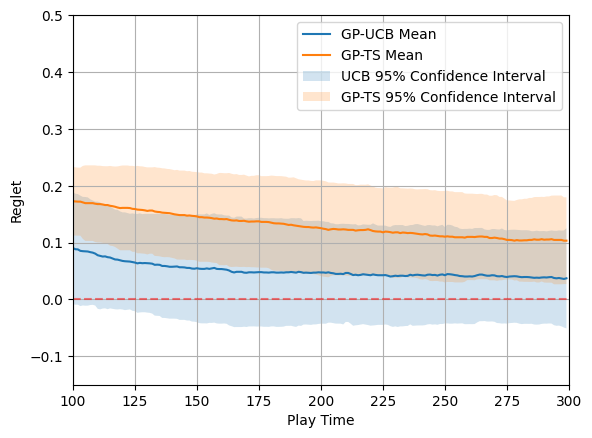

In [83]:
f_max = 0.2
f_sigma = 0.1

plot_cumulative_reward_comparison(f_max, f_sigma)